In [32]:
%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import pyfits as pf

In [33]:
A7 = pf.open('data/C7_0_0.fits')
x = np.genfromtxt('data/C7_0_0.zm')

In [34]:
A7[20].data.shape

(109L, 109L)

In [35]:
data = np.zeros([109,109,len(A7)])
for i in range(len(A7)):
    data[:, :, i] = A7[i].data

<IPython.core.display.Javascript object>


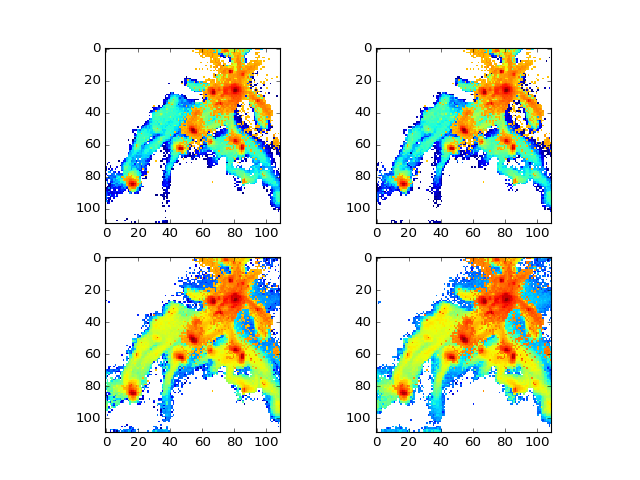

C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log10
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log10
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log10


In [55]:
plt.figure(1)
plt.subplot(221)
plt.imshow(np.log10(data[:,:,0]), interpolation='nearest')
plt.subplot(222)
plt.imshow(np.log10(data[:,:,150]), interpolation='nearest')
plt.subplot(223)
plt.imshow(np.log10(data[:,:,400]), interpolation='nearest')
plt.subplot(224)
plt.imshow(np.log10(data[:,:,-1]), interpolation='nearest')

<IPython.core.display.Javascript object>


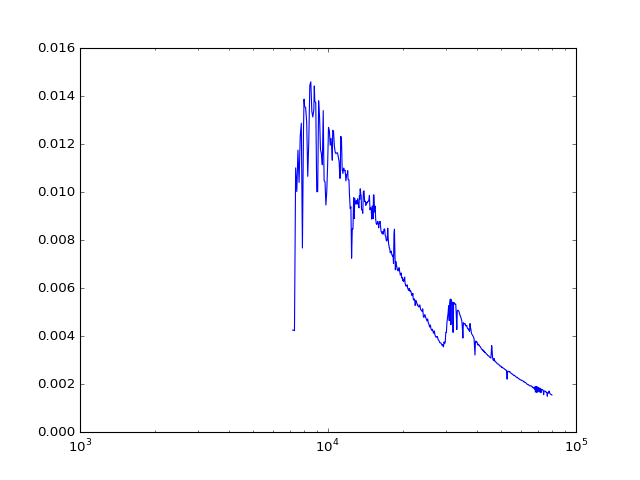

In [232]:
plt.figure(2)
c = 3e10
z = 7. 
def get_SED(coords='all'):
    if coords=='all':
        lam = (1+z)*c/x[:,0]/1e-8
        flam = x[:,1]*x[:,0]/(1+z)/c/(6000e6/0.7/10)**2
        return lam, flam
    else:
        lam  = (1+z)*c/x[:,0]/1e-8
        flam = data[coords[0], coords[1], :]*x[:,0]/(1+z)/c/(6000e6/0.7/10)**2
        return lam, flam

lam, flam = get_SED()
plt.plot(lam,flam)
plt.xscale('log')

In [85]:
print np.trapz(x[:,1], x[:,0]) # *1e-23/(6000e6/0.7/10)**2
print np.trapz(x[:,1]*x[:,0]**2/c, c/x[:,0])

2.68649824266e+27
-2.68644723174e+27


In [146]:
filters_info = []
for line in open('data/FILTER.RES.latest.info', 'r'):
    filters_info.append(np.array(line.split()))
filters_info = np.array(filters_info)

temp_filters = open('data/FILTER.RES.latest', 'r')
filters = []
filters_names = []
first = True

for line in temp_filters:
    if line[0] == ' ':
        if not first:
            filters.append(np.array(temp))
        first = False
        filters_names.append(line.split())
        temp = []
        print line
    else:
        temp.append(np.array(line.split()).astype('float'))

filters = np.array(filters)

   133 hst/ACS_update_sep07/wfc_f435w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.3179e+03 AB-Vega=-0.104 w95=993.1

   121 hst/ACS_update_sep07/wfc_f475w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.7453e+03 AB-Vega=-0.101 w95=1412.8

   118 hst/ACS_update_sep07/wfc_f555w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.3601e+03 AB-Vega=-0.009 w95=1260.9

   173 hst/ACS_update_sep07/wfc_f606w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.9194e+03 AB-Vega= 0.082 w95=2225.4

    86 hst/ACS_update_sep07/wfc_f775w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 7.6933e+03 AB-Vega= 0.385 w95=1490.9

   117 hst/ACS_update_sep07/wfc_f814w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 8.0599e+03 AB-Vega= 0.419 w95=2359.0

   102 hst/ACS_update_sep07/wfc_f850lp_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 9.0364e+03 AB-Vega= 0.519 w95=2096.6

   193 hst/nicmos_f110w.dat synphot-calcband lambda_c= 1.1234e+04 AB-Vega= 0.725 w95=5536.9

   110 hst/nicmos_f160w.dat synphot-calcband lambda_c= 1.603

<IPython.core.display.Javascript object>


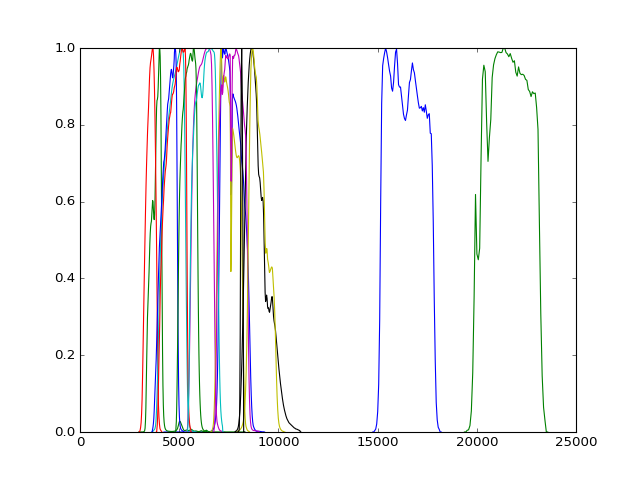

204
269
47
89
75
100
134
161
107
118
92
94
81
14
70
61


In [147]:
plt.figure(5)
for ifilt in range(len(filters_names)):
    if filters_names[ifilt][1][:3] == 'COS':
        print filters_names[ifilt][0]
        plt.plot(filters[ifilt][:,1], filters[ifilt][:,2])

In [138]:
filters_names = np.array(filters_names)
filters_names[np.array([a[0] for a in filters_names]).astype(int) == 236]

array([ ['236', 'musyc/B_1255_tot.dat', 'lambda_c=', '4.4186e+03', 'AB-Vega=-0.102', 'w95=1319.0'],
       ['236', 'hst/wfc3/IR/f098m.dat', 'calcband_wfc3-ir-f098m', 'lambda_c=', '9.8668e+03', 'AB-Vega=', '0.558', 'w95=1631.3']], dtype=object)

In [228]:
def get_filter_by_id(id):
    temp = np.array([a[0] for a in filters_info]).astype(int)
    name = filters_info[np.where(temp==id)[0][0]][1]
    names = np.array([a[1] for a in filters_names])
#     print name
    return filters[np.where(name == names)[0][0]]

<IPython.core.display.Javascript object>


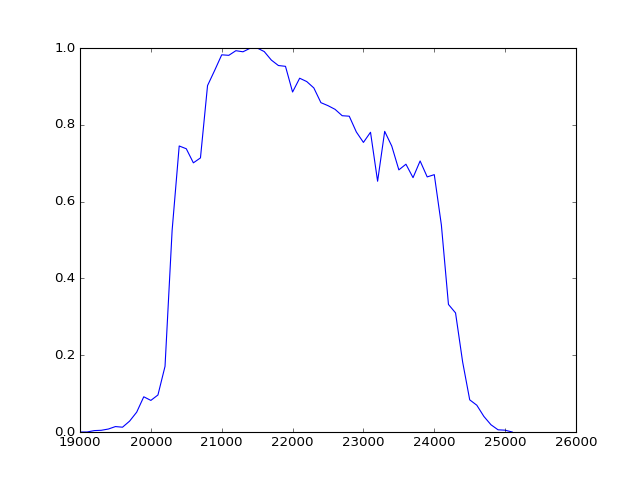

In [229]:
filt = get_filter_by_id(28)
plt.figure(6)
plt.plot(filt[:,1], filt[:,2])

In [188]:
def filters_by_survey(s):
    if s==0:
        fname = 'data/aegis_3dhst.v4.1.translate'
    elif s==1:
        fname = 'data/cosmos_3dhst.v4.1.translate'
    elif s==2:
        fname = 'data/goodsn_3dhst.v4.1.translate'
    elif s==3:
        fname = 'data/goodss_3dhst.v4.1.translate'
    elif s==4:
        fname = 'data/uds_3dhst.v4.2.translate'
    filt_list = np.genfromtxt(fname, dtype=None)
    return np.unique(np.array([a[1:] for a in filt_list[:,1]]).astype(int))



array([ 18,  19,  20,  21,  79,  88, 122, 123, 124, 125, 203, 204, 205,
       236, 239, 263, 264, 265])

<IPython.core.display.Javascript object>


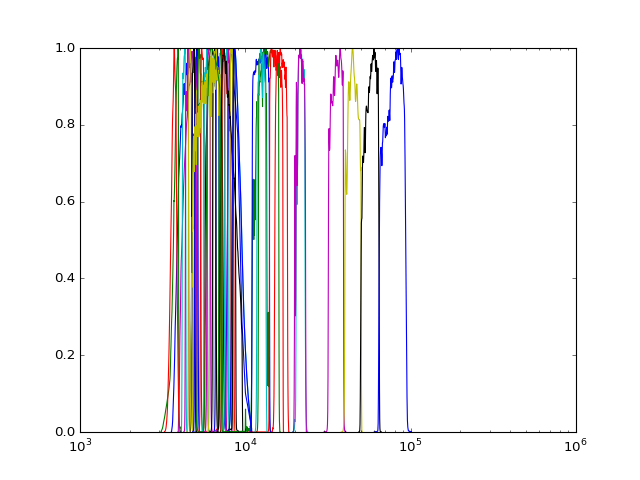

In [230]:
for i in filters_by_survey(3):
    filt = get_filter_by_id(i)
    plt.figure(7)
    plt.plot(filt[:,1], filt[:,2])

plt.xscale('log')

<IPython.core.display.Javascript object>


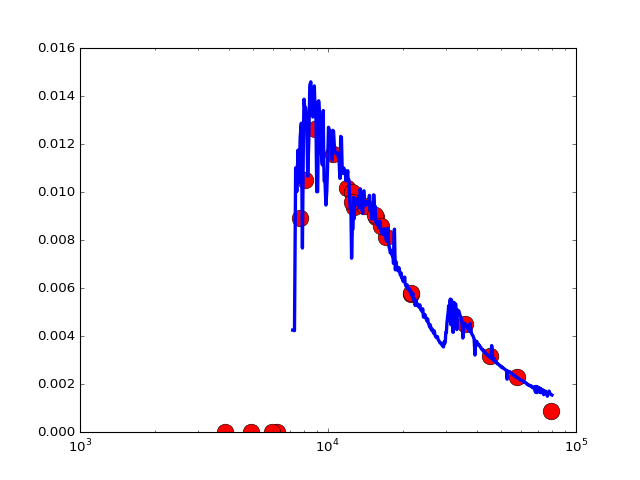

In [234]:

lam,flam = get_SED()
lam=lam[::-1]
flam=flam[::-1]

def get_measurements(lam, flam, s_id):
    filters_list = filters_by_survey(s_id)
#     print filters_list
    res = np.zeros([len(filters_list),2])
    j=0
    for i in filters_list:
#         print i
        filt = get_filter_by_id(i)
        flam_temp = np.interp(filt[:,1], lam, flam, left=0, right=0)
        f_flam = np.trapz(flam_temp*filt[:, 2], filt[:,1]) / np.trapz(filt[:, 2], filt[:,1]) 
        f_lam = np.trapz(filt[:,1]*filt[:, 2], filt[:,1]) / np.trapz(filt[:, 2], filt[:,1])
        res[j,:] = f_lam, f_flam
        j+=1
#         print f_lam, f_flam
    return res

res = get_measurements(lam, flam, 0)
plt.figure(9)
plt.plot(res[:,0], res[:,1], 'or', ms=15)
plt.plot(lam,flam,lw=3)
plt.xscale('log')

In [241]:
s_id = 3
n_filts = filters_by_survey(s_id)

data_f = np.zeros([int(data.shape[0]),int(data.shape[1]) ,len(n_filts)])

for j in range(data.shape[0]):
    print j
    for k in range(data.shape[1]):
        lam,flam = get_SED([j,k])
        lam=lam[::-1]
        flam=flam[::-1]
        res = get_measurements(lam, flam, s_id)
        data_f[j, k, :] = res[:,1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108


(109L, 109L, 44L)


<IPython.core.display.Javascript object>


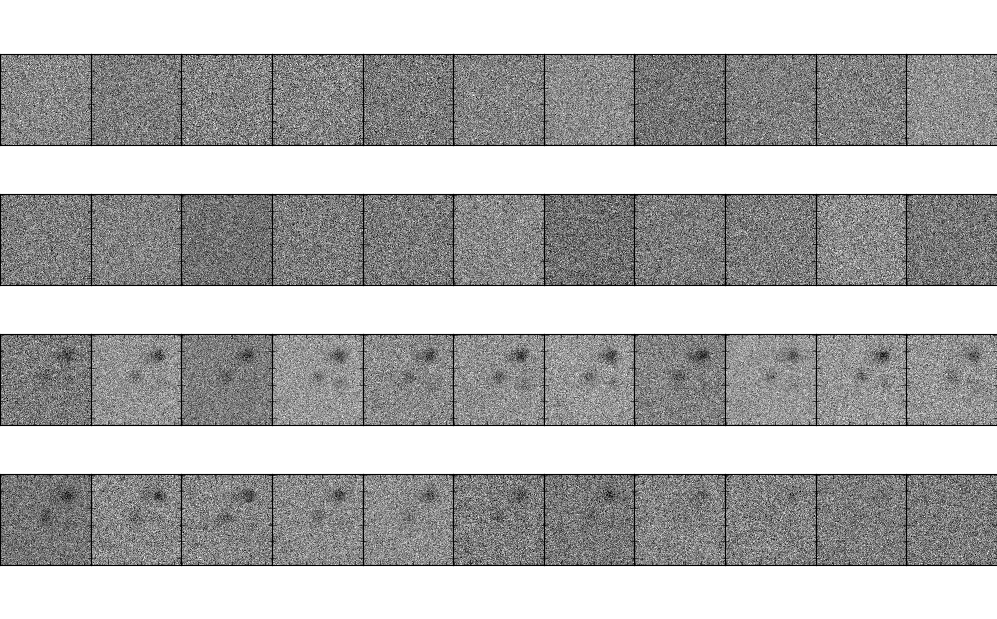

In [280]:

import scipy.ndimage as ndimage
print data_f.shape

plt.figure(10)

for ii in range(44):
    ax = plt.subplot(4,11,ii+1)
    i = np.argsort(res[:,0])[ii]
    noise = np.random.randn(data_f.shape[0]*data_f.shape[1]).reshape([data_f.shape[0], data_f.shape[1]]) * 0.00001
    plt.imshow(noise + ndimage.gaussian_filter(data_f[:,:,i], sigma=(5, 5), order=0), interpolation='nearest', cmap='gray_r')
    ax.set_yticklabels([])
    ax.set_xticklabels([])

# img = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

In [277]:
np.argsort(res[:,0])

array([16, 15, 17,  0, 18, 11, 19, 20, 21, 22, 12, 23, 24,  1, 40, 25, 26,
       43, 27, 13, 28, 29, 30, 31,  2, 32, 41, 33, 34, 14, 42,  3,  8, 35,
       38, 36, 37,  9, 39, 10,  4,  5,  6,  7], dtype=int64)